<a href="https://colab.research.google.com/github/kumarprakhar14/Indian-Space-Festival/blob/main/isf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Data2.csv')

In [2]:
data.head()

,State Identifer,FY,Agriculture,Barren land,Buildup(Mining),Buildup(Rural),Buildup(Urban),Forest,Wet lands,GDP_Agric,GDP_Industry,GDP_Service,TotalGDP,Unnamed: 13
0,UP,2005-06,187013.85,687.72,98.53,7001.23,4141.60,12618.51,11362.04,2973694,5460143,13135777,27781788,NaN
1,UP,2011-12,194583.39,7587.55,367.92,8258.82,3921.13,15485.14,10567.19,8726191,9640976,22578126,41840413,NaN
2,UP,2015-16,194498.37,219.60,407.55,8289.32,4101.90,15469.85,10569.58,12645300,9716501,41693882,113780794,NaN
3,AP,2005-06,166112.16,3297.70,740.19,4922.85,2596.83,59550.71,18582.09,3128389,2489325,7126015,14197662,NaN
4,AP,2011-12,95892.25,15585.19,446.52,2926.42,1503.12,34572.64,11965.12,3904992,5091104,11875005,22128548,NaN


In [3]:
data = data.drop(['Unnamed: 13'], axis=1)

LabelEncoding

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
data['State Identifer'] = encoder.fit_transform(data['State Identifer'])

In [6]:
data['FY'] = encoder.fit_transform(data['FY'])

In [7]:
data.head()

,State Identifer,FY,Agriculture,Barren land,Buildup(Mining),Buildup(Rural),Buildup(Urban),Forest,Wet lands,GDP_Agric,GDP_Industry,GDP_Service,TotalGDP
0,5,0,187013.85,687.72,98.53,7001.23,4141.60,12618.51,11362.04,2973694,5460143,13135777,27781788
1,5,1,194583.39,7587.55,367.92,8258.82,3921.13,15485.14,10567.19,8726191,9640976,22578126,41840413
2,5,2,194498.37,219.60,407.55,8289.32,4101.90,15469.85,10569.58,12645300,9716501,41693882,113780794
3,0,0,166112.16,3297.70,740.19,4922.85,2596.83,59550.71,18582.09,3128389,2489325,7126015,14197662
4,0,1,95892.25,15585.19,446.52,2926.42,1503.12,34572.64,11965.12,3904992,5091104,11875005,22128548


Data Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

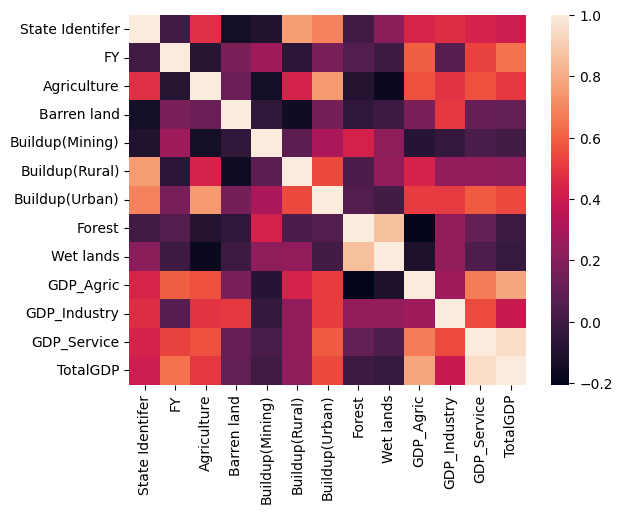

In [9]:
sns.heatmap(data.corr())

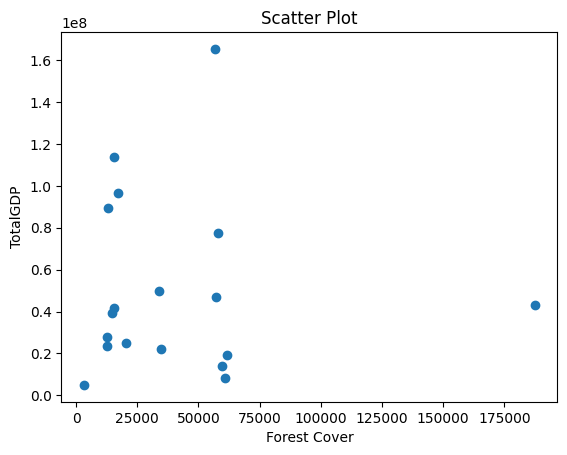

In [12]:
plt.scatter(data['Forest'], data['TotalGDP'])
plt.xlabel('Forest Cover')
plt.ylabel('TotalGDP')
plt.title('Scatter Plot')
plt.show()

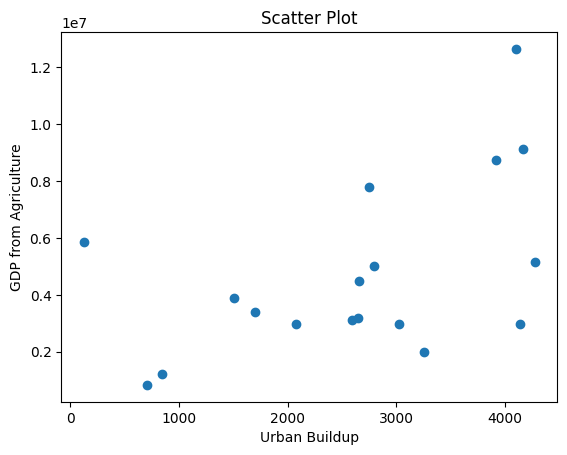

In [11]:
plt.scatter(data['Buildup(Urban)'], data['GDP_Agric'])
plt.xlabel('Urban Buildup')
plt.ylabel('GDP from Agriculture')
plt.title('Scatter Plot')
plt.show()

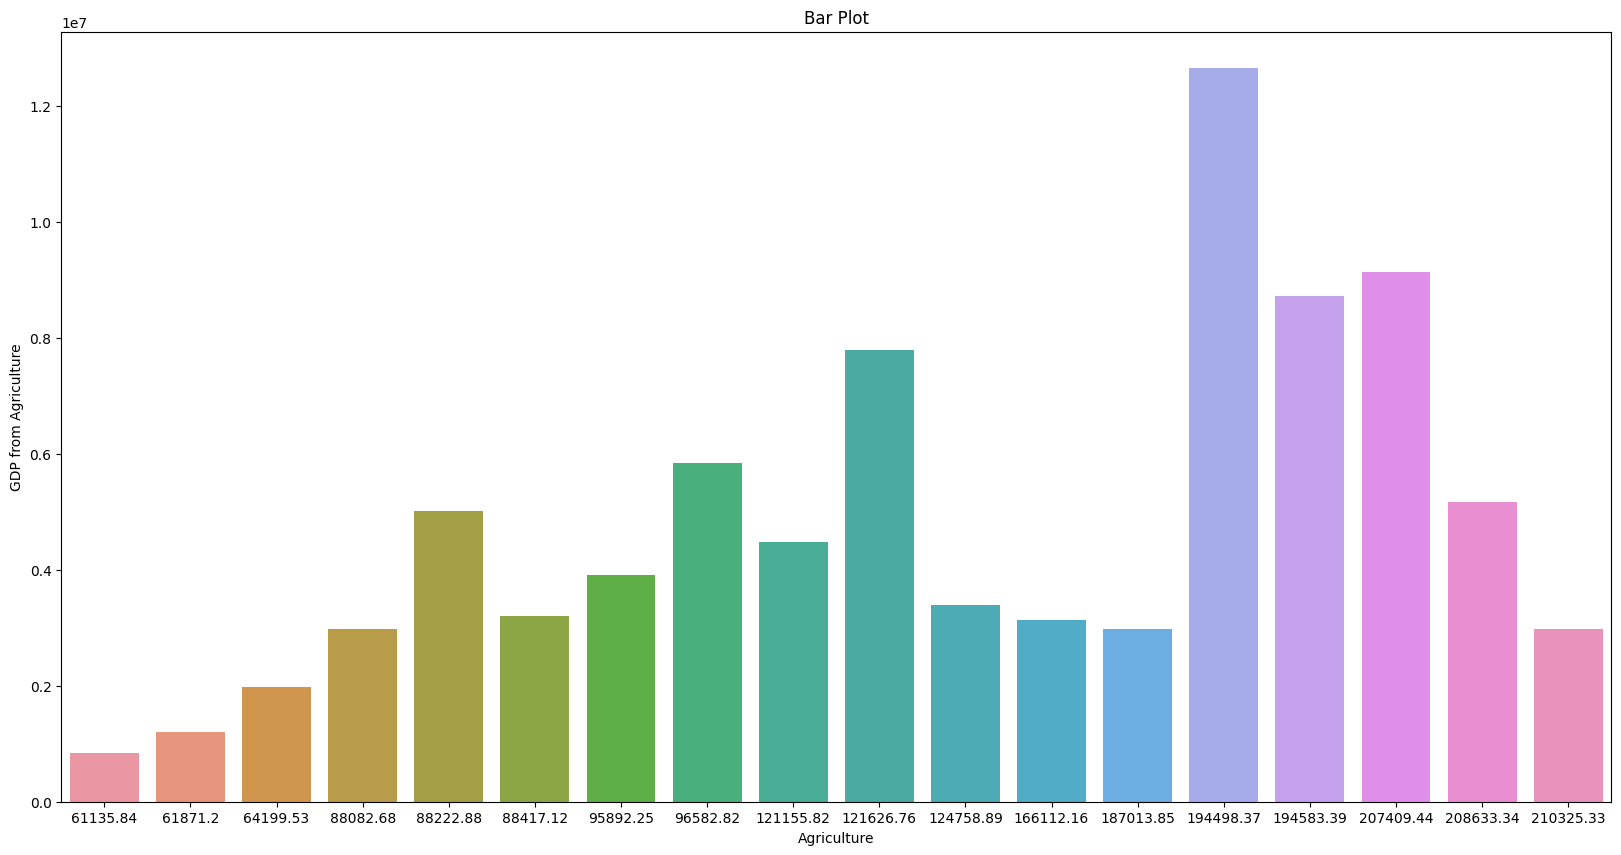

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x=data["Agriculture"], y=data['GDP_Agric'])
plt.xlabel('Agriculture')
plt.ylabel('GDP from Agriculture')
plt.title('Bar Plot')
plt.show()

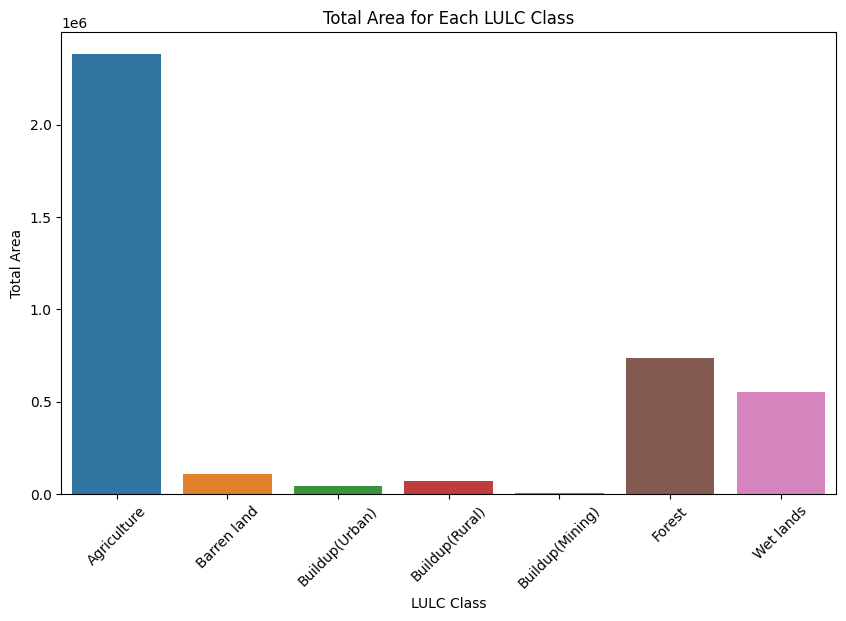

In [14]:
# Plot a bar chart for the LULC classes
lulc_columns = ['Agriculture', 'Barren land', 'Buildup(Urban)','Buildup(Rural)', 'Buildup(Mining)', 'Forest', 'Wet lands']
lulc_data = data[lulc_columns].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=lulc_data.index, y=lulc_data.values)
plt.title('Total Area for Each LULC Class')
plt.xlabel('LULC Class')
plt.ylabel('Total Area')
plt.xticks(rotation=45)
plt.show()

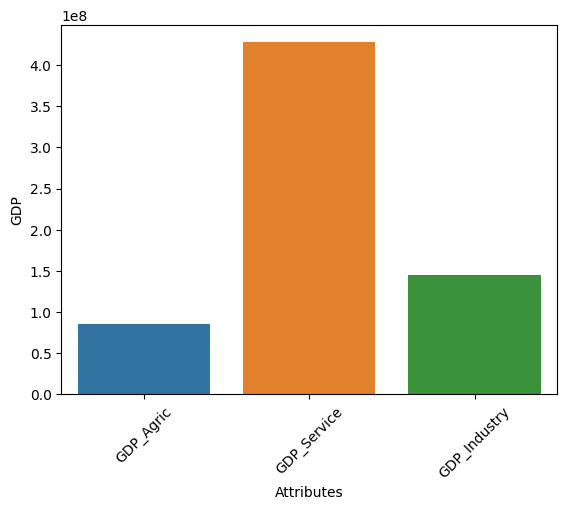

In [15]:
# Plot a bar chart for the GDP from various attributes
GDP_columns = ['GDP_Agric', 'GDP_Service', 'GDP_Industry']
GDP_data = data[GDP_columns].sum()

sns.barplot(x=GDP_data.index, y=GDP_data.values)

plt.xlabel('Attributes')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.show()

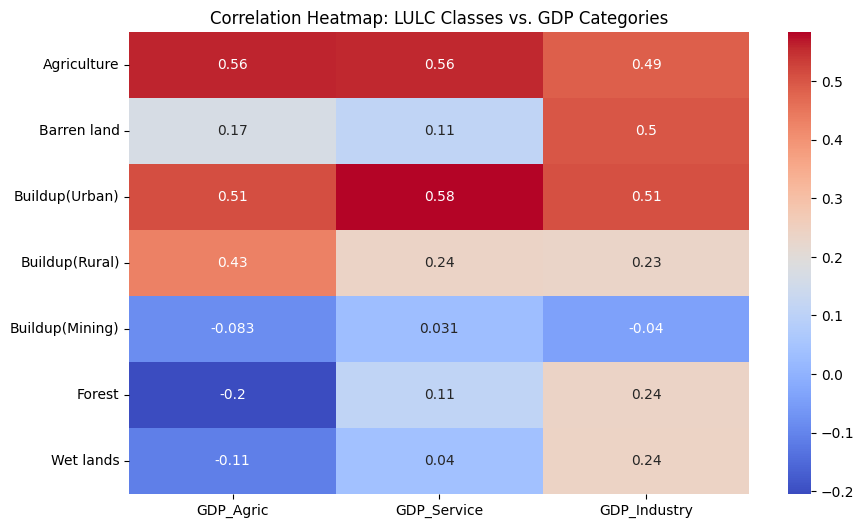

In [16]:
# Create a heatmap to visualize the correlation between LULC classes and GDP categories
lulc_gdp_corr = data.corr().loc[lulc_columns, GDP_columns]
plt.figure(figsize=(10, 6))
sns.heatmap(lulc_gdp_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: LULC Classes vs. GDP Categories')
plt.show()

Spliting the dataset

In [17]:
X = data.drop(['TotalGDP'], axis=1)
y = data['TotalGDP']

Model Deployment

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=True)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: -26.13098415688589


In [22]:
ans = model.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test, ans)

In [24]:
score

-26.13098415688589

Training on a differnt model

In [25]:
X = data.drop(['GDP_Agric'], axis=1)
y = data['GDP_Agric']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, )

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
accuracy = model.score(X_test, y_test)
print(accuracy)

-0.5594738619481685


In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

# Calculate metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared: -0.5595
Mean Squared Error (MSE): 24576848101620.5508
Mean Absolute Error (MAE): 4522479.9238
